# Predicting Toronto Ferry Activity

In [1]:
from Model import RedemptionModel 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

In [2]:
# scale target value into (0.5, 1)
floor = .5
cap = 1.
scaler = MinMaxScaler(feature_range=(floor, cap))

In [3]:
def load_data(file):
    # generic data processing function
    df = pd.read_csv(file,
                dtype={'_id':int, 'Redemption Count': int, 'Sales Count':int},
                parse_dates=['Timestamp'])
    df.sort_values('Timestamp', inplace=True)
    # convert to time-aware
    df.set_index('Timestamp', inplace=True)
    df_daily = df.resample('d').sum()
    # engineer some time features 
    df_daily['monthly'] = df_daily.reset_index().Timestamp.dt.month.values
    df_daily['quarter'] = df_daily.reset_index().Timestamp.dt.quarter.values
    return df_daily

In [4]:
df = load_data('./data/Toronto Island Ferry Ticket Counts.csv')

In [5]:
# scale the two target variables into the range of [0.2, 1]
df['rc'] = scaler.fit_transform(df[['Redemption Count']])
df['sc'] = scaler.fit_transform(df[['Sales Count']])

In [6]:
df.head()

,_id,Redemption Count,Sales Count,monthly,quarter,rc,sc
Timestamp,,,,,,,
2015-05-01,986434,1,4,5,2,0.500019,0.500078
2015-05-02,0,0,0,5,2,0.500000,0.500000
2015-05-03,0,0,0,5,2,0.500000,0.500000
2015-05-04,4685343,12,75,5,2,0.500233,0.501466
2015-05-05,11341967,537,549,5,2,0.510428,0.510729


In [7]:
df.describe()

,_id,Redemption Count,Sales Count,monthly,quarter,rc,sc
count,3.692000e+03,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000
mean,8.236286e+06,3131.680390,3182.404659,6.508397,2.502979,0.560814,0.562193
std,4.677302e+06,4343.187009,4344.053624,3.433967,1.112595,0.084340,0.084895
min,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.500000,0.500000
25%,4.288778e+06,557.750000,470.750000,4.000000,2.000000,0.510831,0.509200
50%,8.483982e+06,1057.000000,1064.500000,6.000000,2.000000,0.520526,0.520803
75%,1.171561e+07,3655.000000,3967.000000,9.000000,3.000000,0.570976,0.577526
max,2.033752e+07,25748.000000,25585.000000,12.000000,4.000000,1.000000,1.000000


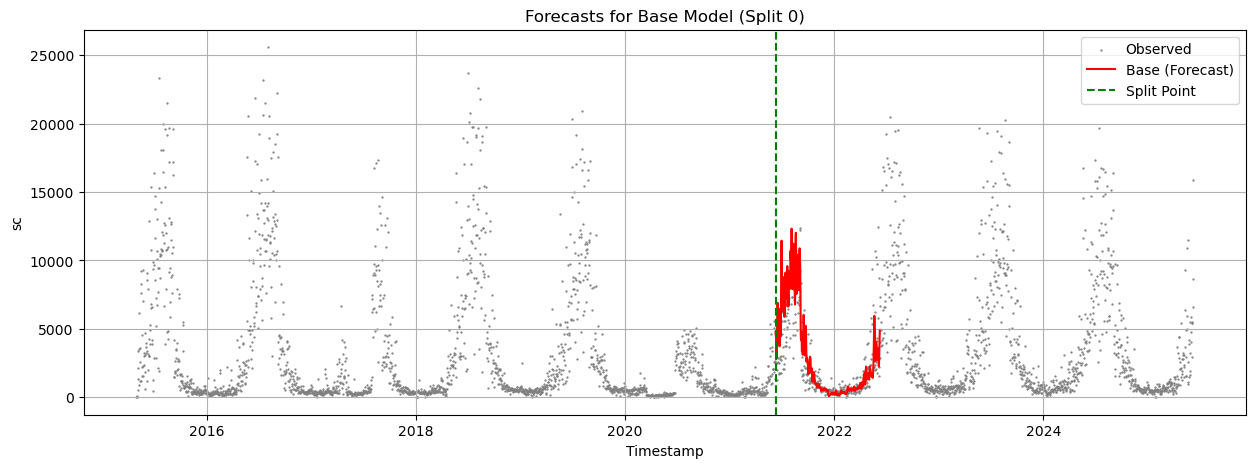

20:26:18 - cmdstanpy - INFO - Chain [1] start processing
20:26:18 - cmdstanpy - INFO - Chain [1] done processing


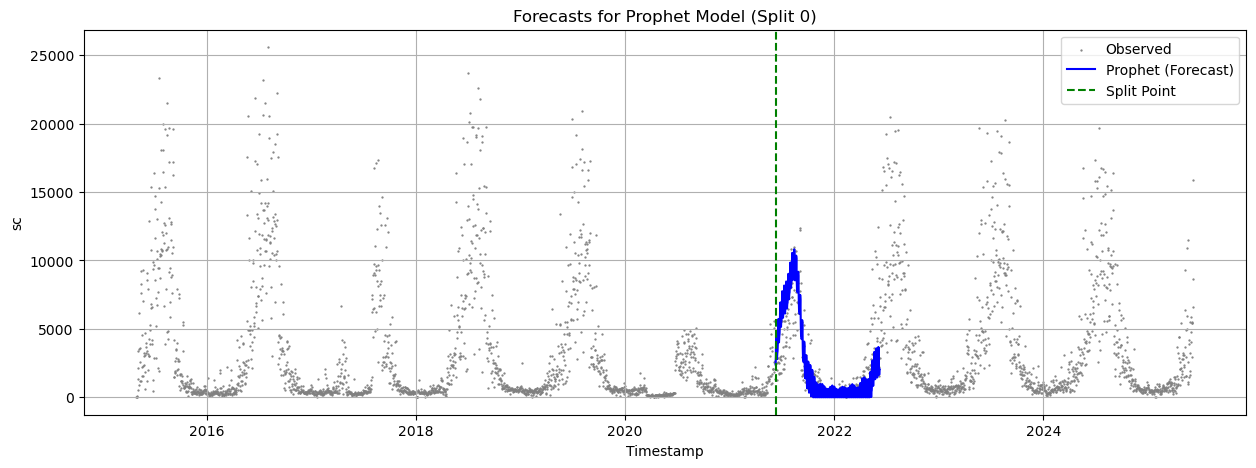

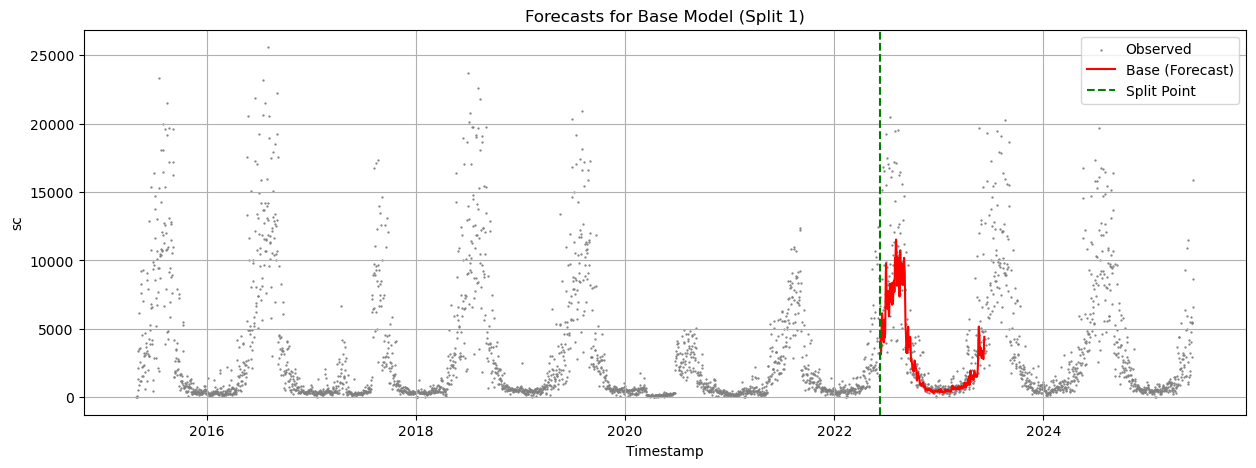

20:26:19 - cmdstanpy - INFO - Chain [1] start processing
20:26:19 - cmdstanpy - INFO - Chain [1] done processing


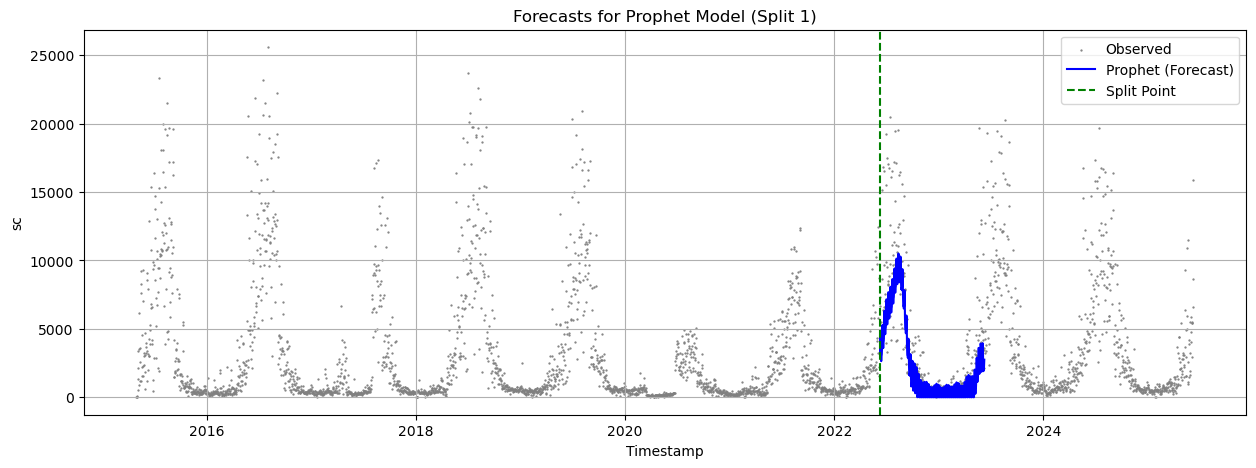

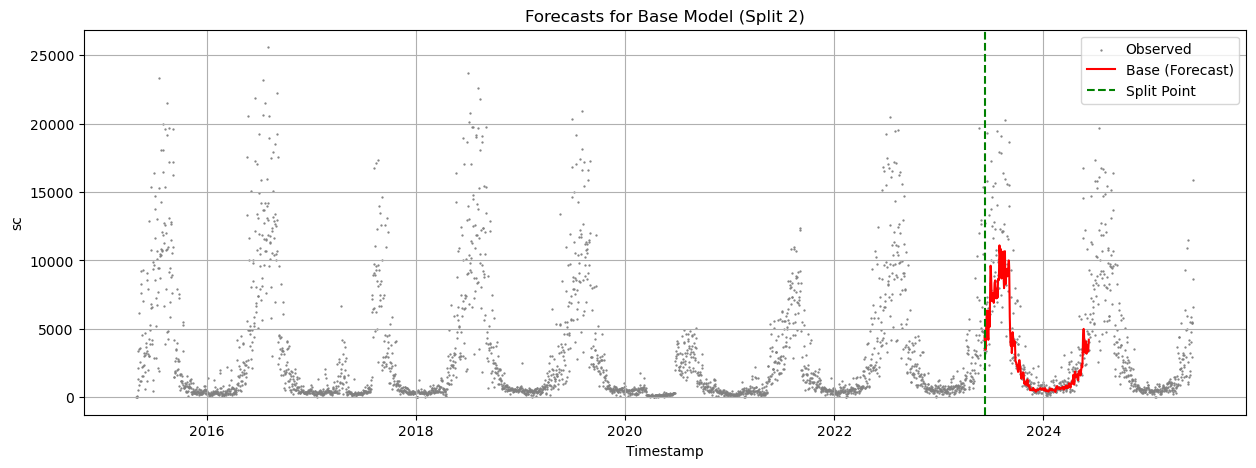

20:26:20 - cmdstanpy - INFO - Chain [1] start processing
20:26:20 - cmdstanpy - INFO - Chain [1] done processing


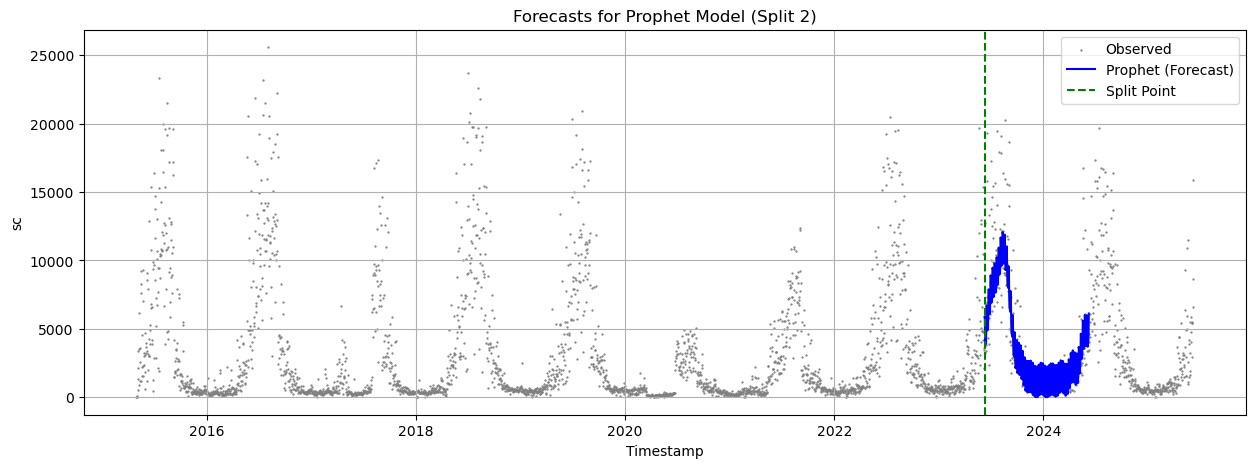

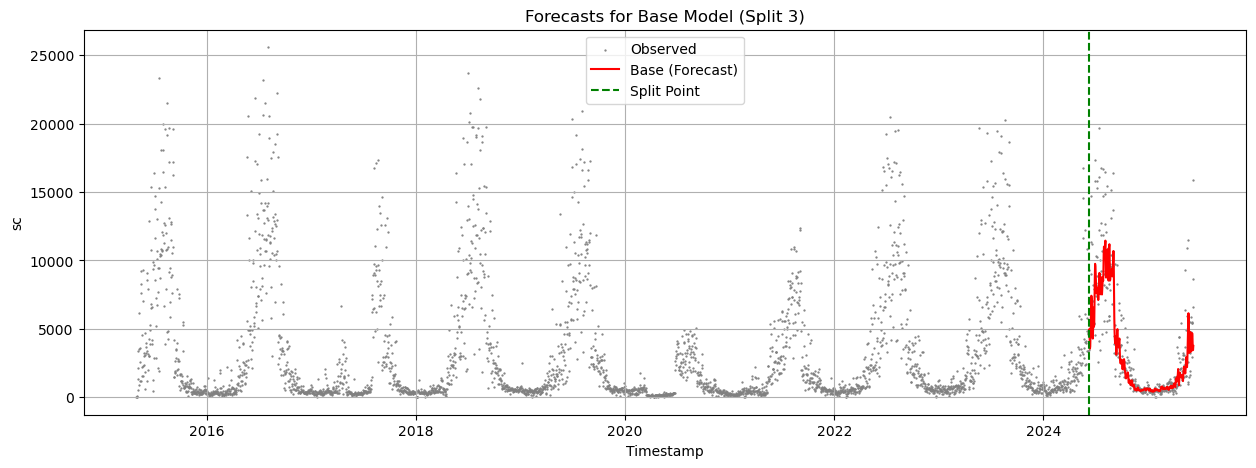

20:26:22 - cmdstanpy - INFO - Chain [1] start processing
20:26:22 - cmdstanpy - INFO - Chain [1] done processing


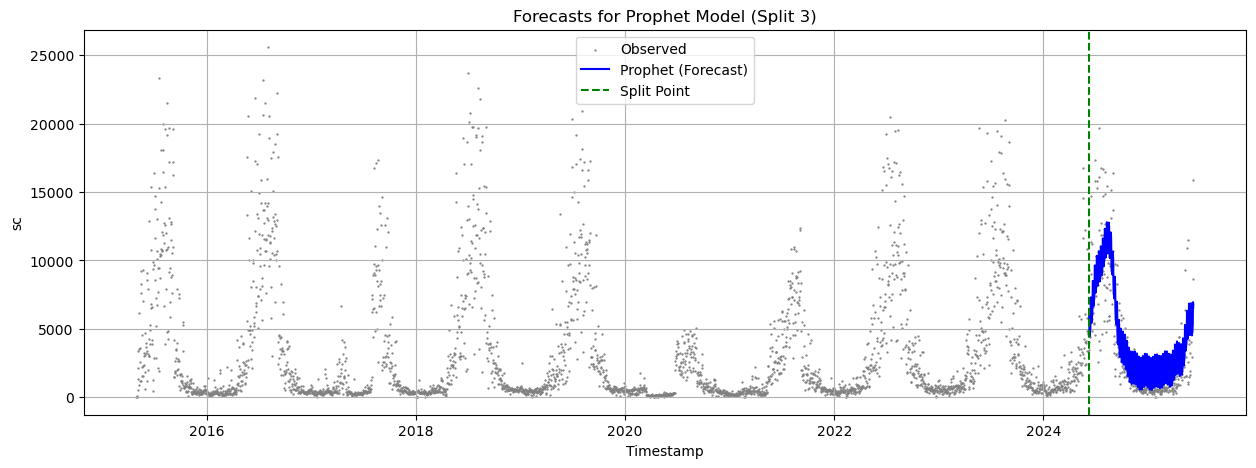

In [8]:
target_col = 'sc'
rm = RedemptionModel(df, target_col, scaler,floor, cap)
rm.run_models(n_splits=4, test_size=365)

In [9]:
# print model summary stats
rm.results

{'Base': {0: 0.04165476915814276,
  1: 0.045701499537822196,
  2: 0.039429208342067576,
  3: 0.04321770021063337},
 'Prophet': {0: 0.041406378782810074,
  1: 0.058437445118587804,
  2: 0.043813959516183366,
  3: 0.05036985056737499}}